# Drawing Basic Sentiment Curves

First part of the project is to extract amplitude values for the windows by using the sentiments. Unfortunately the Syuhzet dictionaries and the method used in the original paper are currently only available for R, thus I will do preliminary demonstration with Python and NLTK only. NLTK reports three distinct sentiments; let's see how they look like.

In [1]:
# Just testing how to reuse modules on Jupyter Notebooks

import os
import sys
sys.path.insert(0, os.path.abspath('../modules'))

from book_analytics import BookAnalytics

ba = BookAnalytics("64317.txt.utf-8", book_path="../static/books")
windows, title = ba.parse()
print(len(windows))
print(windows[50])

[nltk_data] Downloading package names to /home/ahtiah/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ahtiah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /home/ahtiah/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/ahtiah/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/ahtiah/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ahtiah/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ahtiah/nltk_data...
[nltk_data]   Packag

709
{'text': 'Do you see ?” There was something pathetic in his concentration , as if his complacency , more acute than of old , was not enough to him any more . When , almost immediately , the telephone rang inside and the butler left the porch Daisy seized upon the momentary interruption and leaned towards me . “ I ’ ll tell you a family secret ,” she whispered enthusiastically . “ It ’ s about the butler ’ s nose . Do you want to hear about the butler ’ s nose ?”', 'sentiment': {'neg': 0.081, 'neu': 0.859, 'pos': 0.06, 'compound': -0.3939}}


In [12]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

[0.19, 0.106, 0.056, 0.0, 0.139, 0.064, 0.261, 0.058, 0.221, 0.108] [0.049, 0.039, 0.056, 0.047, 0.088, 0.073, 0.0, 0.072, 0.133, 0.075] [0.761, 0.856, 0.888, 0.953, 0.772, 0.863, 0.739, 0.87, 0.646, 0.817] [0.8718, 0.7785, -0.0098, -0.3818, 0.7377, -0.1531, 0.979, -0.5719, 0.7957, 0.4817]


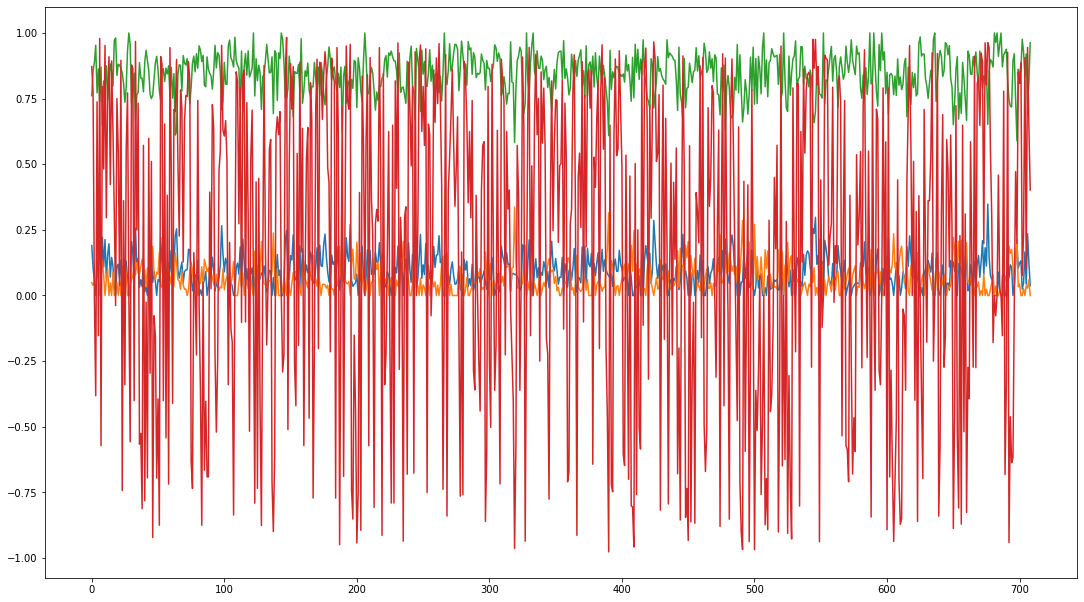

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

pos = []
neg = []
neu = []
compound = []
base = []

for window in windows:
    pos.append(window['sentiment']['pos'])
    neg.append(window['sentiment']['neg'])
    neu.append(window['sentiment']['neu'])
    compound.append(window['sentiment']['compound'])

print(pos[0:10], neg[0:10], neu[0:10], compound[0:10])

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(range(len(pos)), pos, label="Positive")
ax.plot(range(len(pos)), neg, label="Negative")
ax.plot(range(len(pos)), neu, label="Neutral")
ax.plot(range(len(pos)), compound, label="Compound");

## Deeper Investigation

Do we have anything useful here? Let's locate uninteresting dramatic paragraph from the data (paragraph 184).

171 The moon had risen higher , and floating in the Sound was a triangle of silver scales , trembling a little to the stiff , tinny drip of the banjoes on the lawn . I was still with Jordan Baker . We were sitting at a table with a man of about my age and a rowdy little girl , who gave way upon the slightest provocation to uncontrollable laughter .
172 I was enjoying myself now . I had taken two finger - bowls of champagne , and the scene had changed before my eyes into something significant , elemental , and profound . At a lull in the entertainment the man looked at me and smiled . “ Your face is familiar ,” he said politely . “ Weren ’ t you in the First Division during the war ?” “ Why yes . I was in the Twenty - eighth Infantry .” “ I was in the Sixteenth until June nineteen - eighteen .
173 I knew I ’ d seen you somewhere before .” We talked for a moment about some wet , grey little villages in France . Evidently he lived in this vicinity , for he told me that he had just bought 

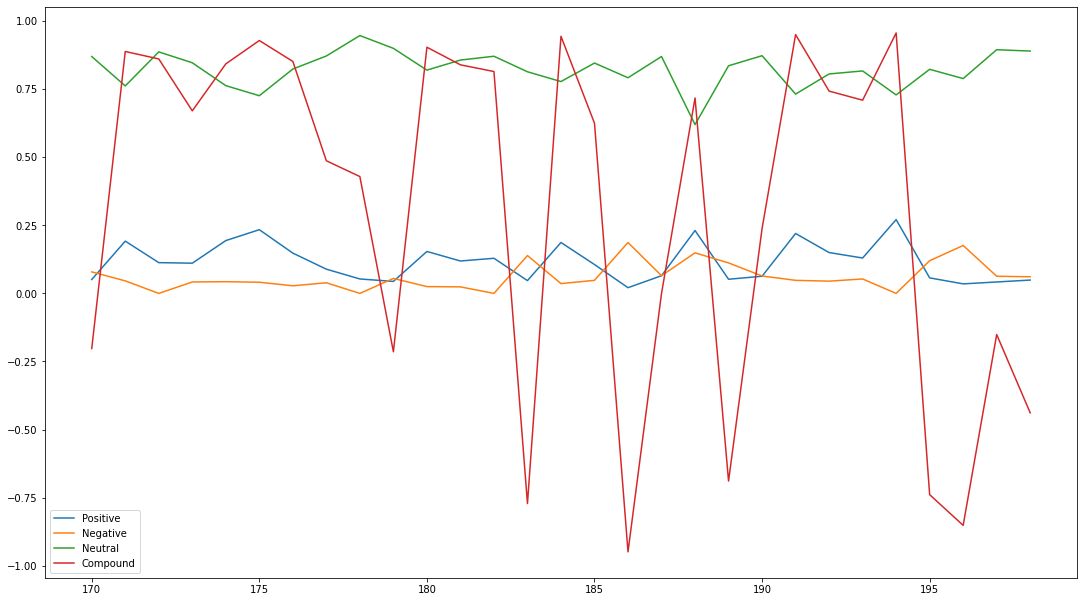

In [14]:
def get_sub(start, end, windows):
    sub_pos = []
    sub_neg = []
    sub_neu = []
    sub_compound = []
    for i in range(len(windows)):
        if i > start and i < end:
            print(i, windows[i]['text'])
            sub_pos.append(windows[i]['sentiment']['pos'])
            sub_neg.append(windows[i]['sentiment']['neg'])
            sub_neu.append(windows[i]['sentiment']['neu'])
            sub_compound.append(windows[i]['sentiment']['compound'])
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.plot(range(start, start + len(sub_pos)), sub_pos, label="Positive")
    ax.plot(range(start, start + len(sub_neg)), sub_neg, label="Negative")
    ax.plot(range(start, start + len(sub_neu)), sub_neu, label="Neutral")
    ax.plot(range(start, start + len(sub_compound)), sub_compound, label="Compound");
    ax.legend()
    
%matplotlib inline
get_sub(170, 200, windows)

Then we have the MICE start for an inquiry arc in here at paragraph 394

381 Or perhaps I had merely grown used to it , grown to accept West Egg as a world complete in itself , with its own standards and its own great figures , second to nothing because it had no consciousness of being so , and now I was looking at it again , through Daisy ’ s eyes .
382 It is invariably saddening to look through new eyes at things upon which you have expended your own powers of adjustment . They arrived at twilight , and , as we strolled out among the sparkling hundreds , Daisy ’ s voice was playing murmurous tricks in her throat . “ These things excite me so ,” she whispered . “ If you want to kiss me any time during the evening , Nick , just let me know and I ’ ll be glad to arrange it for you .
383 Just mention my name . Or present a green card . I ’ m giving out green —” “ Look around ,” suggested Gatsby . “ I ’ m looking around . I ’ m having a marvellous —” “ You must see the faces of many people you ’ ve heard about .” Tom ’ s arrogant eyes roamed the crowd . “ We d

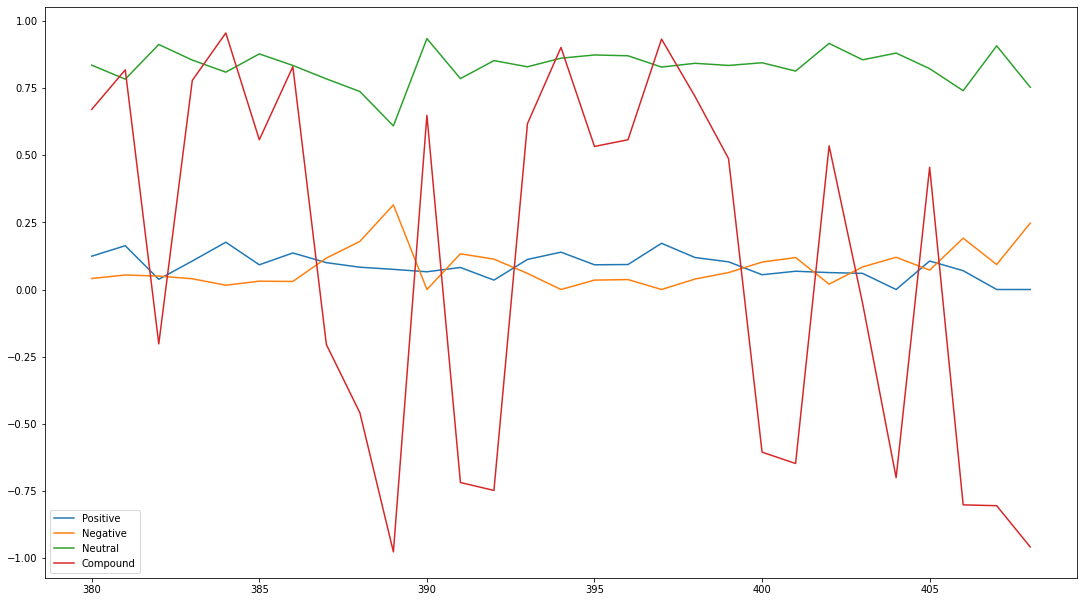

In [16]:
get_sub(380, 410, windows)

## First Step Improvement

Instead of having absolute value of sentiment amplitudes, we might benefit from something that better captures the dynamic changes, like sum of the intervals or a moving average.

In [37]:
inter = []

# Fix this for a bit better way to avoid miss indexing
mov_avg = [0, 0]
inter_sum = [0, 0]

print(compound[0:5])

for i in range(len(compound)):
    if i < len(compound) - 1:
        inter.append(abs(compound[i] - compound[i +1]))
    if i > 4:
        mov_avg.append(sum(compound[i-5:i]) / 5)
        inter_sum.append(sum(inter[i-5:i]))

print(mov_avg[0], mov_avg[len(compound)-5])

[0.8718, 0.7785, -0.0098, -0.3818, 0.7377]
0 0.45348000000000005


171 The moon had risen higher , and floating in the Sound was a triangle of silver scales , trembling a little to the stiff , tinny drip of the banjoes on the lawn . I was still with Jordan Baker . We were sitting at a table with a man of about my age and a rowdy little girl , who gave way upon the slightest provocation to uncontrollable laughter .
172 I was enjoying myself now . I had taken two finger - bowls of champagne , and the scene had changed before my eyes into something significant , elemental , and profound . At a lull in the entertainment the man looked at me and smiled . “ Your face is familiar ,” he said politely . “ Weren ’ t you in the First Division during the war ?” “ Why yes . I was in the Twenty - eighth Infantry .” “ I was in the Sixteenth until June nineteen - eighteen .
173 I knew I ’ d seen you somewhere before .” We talked for a moment about some wet , grey little villages in France . Evidently he lived in this vicinity , for he told me that he had just bought 

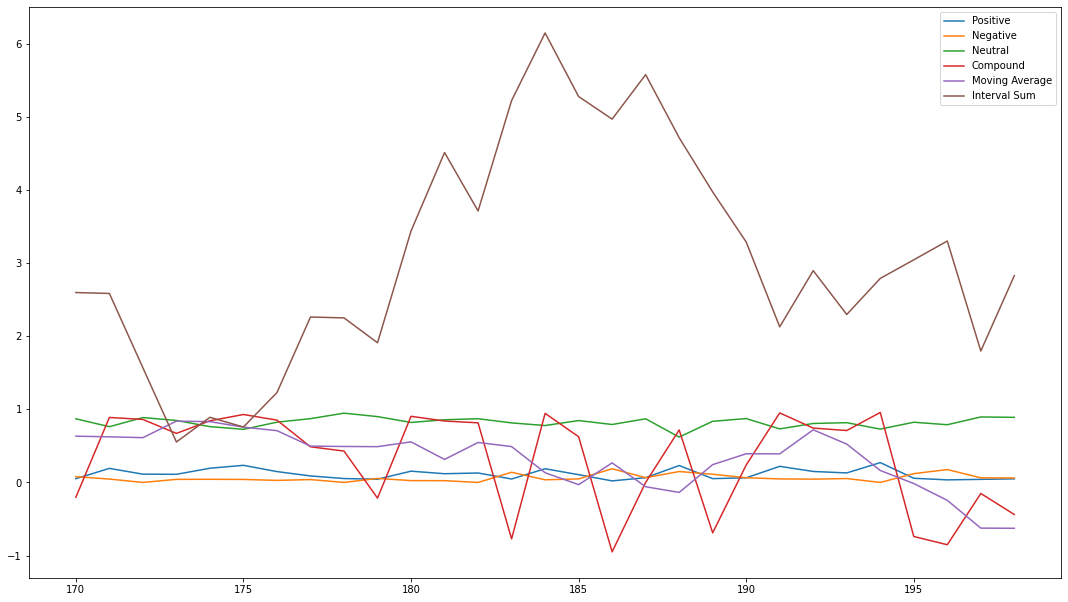

In [39]:
def get_sub_2(start, end, windows):
    sub_pos = []
    sub_neg = []
    sub_neu = []
    sub_compound = []
    sub_mov_avg = []
    sub_inter_sum = []
    for i in range(len(windows)):
        if i > start and i < end:
            print(i, windows[i]['text'])
            sub_pos.append(pos[i])
            sub_neg.append(neg[i])
            sub_neu.append(neu[i])
            sub_compound.append(compound[i])
            sub_mov_avg.append(mov_avg[i])
            sub_inter_sum.append(inter_sum[i])
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.plot(range(start, start + len(sub_pos)), sub_pos, label="Positive")
    ax.plot(range(start, start + len(sub_neg)), sub_neg, label="Negative")
    ax.plot(range(start, start + len(sub_neu)), sub_neu, label="Neutral")
    ax.plot(range(start, start + len(sub_compound)), sub_compound, label="Compound");
    ax.plot(range(start, start + len(sub_mov_avg)), sub_mov_avg, label="Moving Average");
    ax.plot(range(start, start + len(sub_inter_sum)), sub_inter_sum, label="Interval Sum");
    ax.legend()
    
%matplotlib inline
get_sub_2(170, 200, windows)

381 Or perhaps I had merely grown used to it , grown to accept West Egg as a world complete in itself , with its own standards and its own great figures , second to nothing because it had no consciousness of being so , and now I was looking at it again , through Daisy ’ s eyes .
382 It is invariably saddening to look through new eyes at things upon which you have expended your own powers of adjustment . They arrived at twilight , and , as we strolled out among the sparkling hundreds , Daisy ’ s voice was playing murmurous tricks in her throat . “ These things excite me so ,” she whispered . “ If you want to kiss me any time during the evening , Nick , just let me know and I ’ ll be glad to arrange it for you .
383 Just mention my name . Or present a green card . I ’ m giving out green —” “ Look around ,” suggested Gatsby . “ I ’ m looking around . I ’ m having a marvellous —” “ You must see the faces of many people you ’ ve heard about .” Tom ’ s arrogant eyes roamed the crowd . “ We d

403 “ I ’ m going to fix everything just the way it was before ,” he said , nodding determinedly . “ She ’ ll see .” He talked a lot about the past , and I gathered that he wanted to recover something , some idea of himself perhaps , that had gone into loving Daisy . His life had been confused and disordered since then , but if he could once return to a certain starting place and go over it all slowly , he could find out what that thing was …
404 … One autumn night , five years before , they had been walking down the street when the leaves were falling , and they came to a place where there were no trees and the sidewalk was white with moonlight . They stopped here and turned toward each other . Now it was a cool night with that mysterious excitement in it which comes at the two changes of the year . The quiet lights in the houses were humming out into the darkness and there was a stir and bustle among the stars .
405 Out of the corner of his eye Gatsby saw that the blocks of the sidew

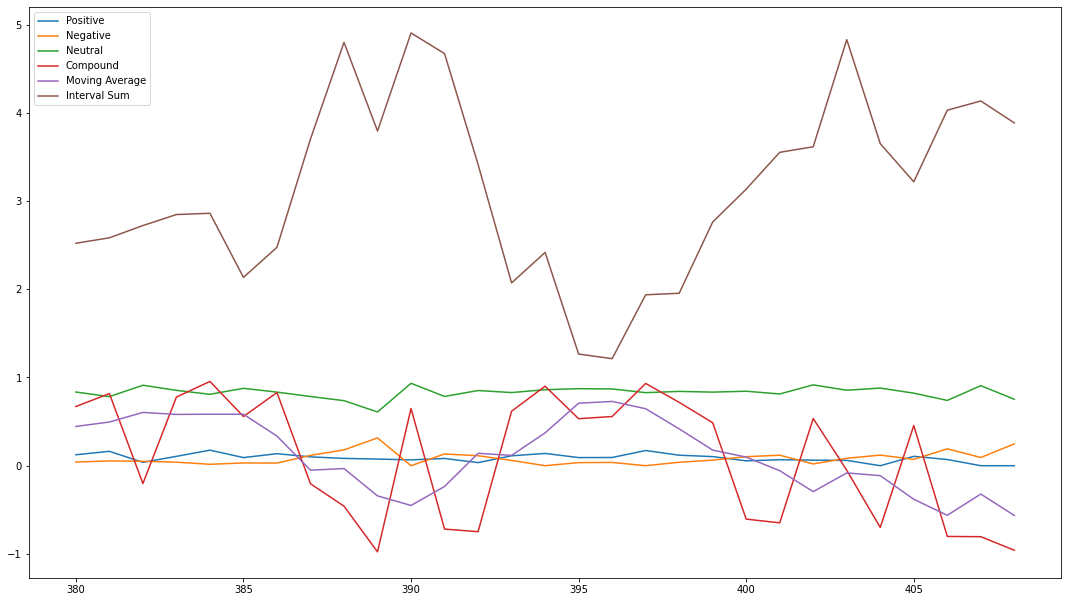

In [40]:
get_sub_2(380, 410, windows)